In [1]:
import requests
import pandas as pd
import numpy as np
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [3]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

# Use json_normalize meethod to convert the json result into a dataframe
data_API = pd.json_normalize(response.json())

# Get the head of the dataframe
data_API.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [4]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data_API = data_API[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data_API = data_API[data_API['cores'].map(len)==1]
data_API = data_API[data_API['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data_API['cores'] = data_API['cores'].map(lambda x : x[0])
data_API['payloads'] = data_API['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data_API['date'] = pd.to_datetime(data_API['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data_API = data_API[data_API['date'] <= datetime.date(2020, 11, 13)]

### Use auxiliary functions to store data in lists and create a new dataframe

In [5]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [12]:
def getBoosterVersion(data_API):
   
    pass  
    
# Call the function after defining it
getBoosterVersion(data_API)


In [14]:
def getLaunchSite(data):
    # Function implementation here
    pass

In [17]:
def getPayloadData(data):
    # Function implementation here
    pass

In [19]:
def getCoreData(data):
    # Function implementation here
    pass

In [20]:
# Call Auxiliary Functions
getBoosterVersion(data_API)
getLaunchSite(data_API)
getPayloadData(data_API)
getCoreData(data_API)

In [24]:
print("FlightNumber:", len(list(data_API['flight_number'])))
print("Date:", len(list(data_API['date'])))
print("BoosterVersion:", len(BoosterVersion))
print("PayloadMass:", len(PayloadMass))
print("Orbit:", len(Orbit))
print("LaunchSite:", len(LaunchSite))
print("Outcome:", len(Outcome))
print("Flights:", len(Flights))
print("GridFins:", len(GridFins))
print("Reused:", len(Reused))
print("Legs:", len(Legs))
print("LandingPad:", len(LandingPad))
print("Block:", len(Block))
print("ReusedCount:", len(ReusedCount))
print("Serial:", len(Serial))
print("Longitude:", len(Longitude))
print("Latitude:", len(Latitude))

FlightNumber: 94
Date: 94
BoosterVersion: 0
PayloadMass: 0
Orbit: 0
LaunchSite: 0
Outcome: 0
Flights: 0
GridFins: 0
Reused: 0
Legs: 0
LandingPad: 0
Block: 0
ReusedCount: 0
Serial: 0
Longitude: 0
Latitude: 0


# Data wrangling

### Filter the dataframe to only include `Falcon 9` launches

In [30]:
for key, value in dict_API.items():
    print(f"{key}: {len(value)}")

FlightNumber: 94
Date: 94
BoosterVersion: 0
PayloadMass: 0
Orbit: 0
LaunchSite: 0
Outcome: 0
Flights: 0
GridFins: 0
Reused: 0
Legs: 0
LandingPad: 0
Block: 0
ReusedCount: 0
Serial: 0
Longitude: 0
Latitude: 0


In [31]:
min_length = min(len(v) for v in dict_API.values())
dict_API = {k: v[:min_length] for k, v in dict_API.items()}

In [32]:
max_length = max(len(v) for v in dict_API.values())
for k, v in dict_API.items():
    if len(v) < max_length:
        dict_API[k] = v + [None] * (max_length - len(v))

In [33]:
df_API = pd.DataFrame(dict_API)

In [34]:
df = df_API[df_API['BoosterVersion']=='Falcon 9']
df.loc[:,'FlightNumber'] = list(range(1, df.shape[0]+1))
df = df.reset_index(drop=True)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude


### Dealing with Missing Values

In [36]:
# We can see below that some of the rows are missing values in our dataset
df.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

In [37]:
# find all landing outcome
landing_outcomes = df['Outcome'].value_counts()
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

In [39]:
print(landing_outcomes)
print(len(landing_outcomes))

Series([], Name: count, dtype: int64)
0


In [40]:
bad_outcomes = set()
all_outcomes = list(landing_outcomes.keys())

# Add outcomes to bad_outcomes if they exist
indices_to_check = [1, 3, 5, 6, 7]
for index in indices_to_check:
    if index < len(all_outcomes):
        bad_outcomes.add(all_outcomes[index])

print(bad_outcomes)

set()


In [47]:
bad_outcomes = set(outcome for outcome, index in landing_outcomes.items() if index in [1, 3, 5, 6, 7])
print(bad_outcomes)

{'Precluded (drone ship)', 'Uncontrolled (ocean)', 'Failure (drone ship)', 'Failure (parachute)'}


In [51]:
# Calculate the mean value of PayloadMass column
PayloadMass_mean = df['PayloadMass'].mean()

# Replace the np.nan values with its mean value
df.loc[:, 'PayloadMass'] = df['PayloadMass'].fillna(PayloadMass_mean)

In [52]:
# Calculate the mean value of PayloadMass column
PayloadMass_mean = df['PayloadMass'].mean()

# Replace the np.nan values with its mean value
df = df.fillna({'PayloadMass': PayloadMass_mean})

In [53]:
# Calculate the mean value of PayloadMass column
PayloadMass_mean = df['PayloadMass'].mean()

# Replace the np.nan values with its mean value
df = df.replace({'PayloadMass': {np.nan: PayloadMass_mean}})

In [54]:
# The number of missing values of the PayLoadMass column change to zero
df.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

### Create a landing outcome label from Outcome column

In [55]:
# find all landing outcome
landing_outcomes = df['Outcome'].value_counts()
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

In [57]:
print(landing_outcomes)
print(type(landing_outcomes))
print(len(landing_outcomes))

Series([], Name: count, dtype: int64)
<class 'pandas.core.series.Series'>
0


In [58]:
landing_outcomes = {
    'Success': 0,
    'Failure (drone ship)': 1,
    'Success (ground pad)': 2,
    'Failure (parachute)': 3,
    'Failure (landing burn)': 4,
    'Precluded (drone ship)': 5,
    'Uncontrolled (ocean)': 6
}

In [59]:
bad_outcomes = {outcome for outcome, index in landing_outcomes.items() if index in [1, 3, 5, 6, 7]}

In [60]:
# identify good and bad outcome
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
landing_class = []
for outcome in df['Outcome']:
    if outcome in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [61]:
# add to dataframe
df['Class']=landing_class
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class


### Identify data type of each column

In [62]:
df.dtypes

FlightNumber      float64
Date              float64
BoosterVersion    float64
PayloadMass       float64
Orbit             float64
LaunchSite        float64
Outcome           float64
Flights           float64
GridFins          float64
Reused            float64
Legs              float64
LandingPad        float64
Block             float64
ReusedCount       float64
Serial            float64
Longitude         float64
Latitude          float64
Class             float64
dtype: object

# Exploratory data analysis

## Pandas

### Calculate the number of launches on each site
The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>

In [63]:
df['LaunchSite'].value_counts()

Series([], Name: count, dtype: int64)

### Calculate the number and occurrence of each orbit
Here are some common orbit types:
*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.
​
*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.
​
*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.
​
*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.
​
*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .
​
*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.
​
*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>
​
*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>
​
*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>
​
*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>
​
*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>
​
![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

In [64]:
df['Orbit'].value_counts()

Series([], Name: count, dtype: int64)

### Find the landing success rate

In [65]:
df["Class"].mean()

nan

## Visualization

### Import visualization library

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualize the relationship between Payload and Launch Site
Firstly, we want to observe if there is any relationship between launch sites and their payload mass.

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the required columns exist
required_columns = ['LaunchSite', 'PayloadMass', 'Class']
if not all(col in df.columns for col in required_columns):
    print("Error: One or more required columns are missing from the DataFrame.")
    missing_columns = [col for col in required_columns if col not in df.columns]
    print(f"Missing columns: {missing_columns}")
else:
    # Remove any rows with NaN values in the required columns
    df_clean = df.dropna(subset=required_columns)

    if df_clean.empty:
        print("Error: No data left after removing NaN values.")
    else:
        # Create the plot
        plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
        sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df_clean, aspect=5, kind="box")
        plt.xlabel("Payload Mass (kg)", fontsize=20)
        plt.ylabel("Launch Site", fontsize=20)
        plt.title("Payload Mass Distribution by Launch Site and Class", fontsize=22)
        plt.tight_layout()
        plt.show()

Error: No data left after removing NaN values.


In [71]:
print(df.shape)
print(df['LaunchSite'].unique())
print(df['PayloadMass'].describe())
print(df['Class'].unique())

(0, 18)
[]
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PayloadMass, dtype: float64
[]


In [72]:
print(df[['LaunchSite', 'PayloadMass', 'Class']].isnull().sum())

LaunchSite     0
PayloadMass    0
Class          0
dtype: int64


In [73]:
df_clean = df.dropna(subset=['LaunchSite', 'PayloadMass', 'Class'])

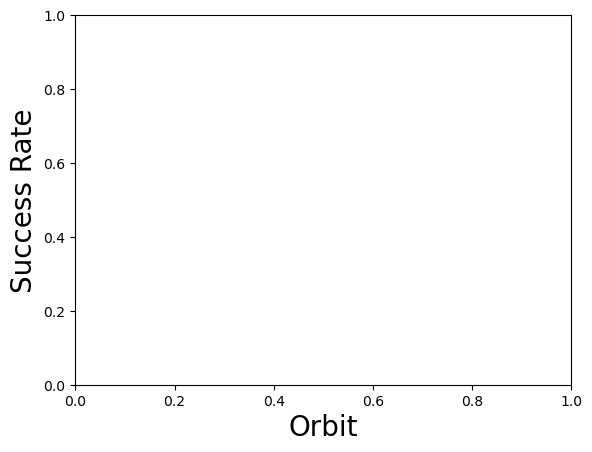

In [86]:
sns.barplot(y="Class", x="Orbit", data=df[['Orbit', 'Class']].groupby(by='Orbit').mean().reset_index())
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

#### With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### Visualize the launch success yearly trend
Lastly, we want to visually check if there are any launch success yearly trend using line plot.

In [80]:
# A function to Extract years from the date 
def Extract_year(date):
    for i in df["Date"]:
        year.append(int(i.strftime("%Y")))
    return year

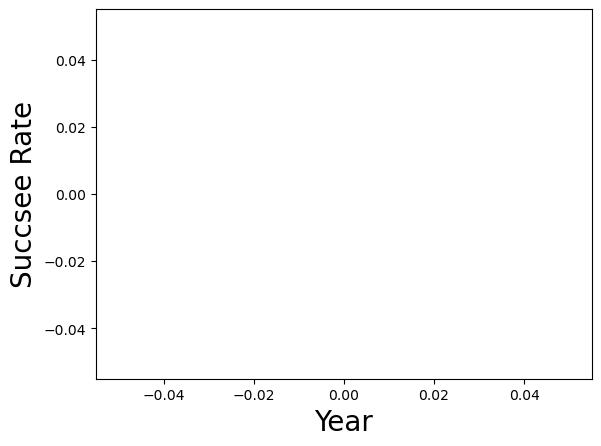

In [81]:
year =[]
df['Year'] = Extract_year(df)
sns.regplot(y="Class", x="Year", data=df[['Year', 'Class']].groupby('Year').mean().reset_index())
plt.xlabel("Year",fontsize=20)
plt.ylabel("Succsee Rate",fontsize=20)
plt.show()

In [83]:
#As we can see above, the success rate tend to improve as the year pass.

# Interactive visual analytics

## Folium Map

In [90]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium DivIcon plugin
from folium.features import DivIcon

## Data wrangling

In [91]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
df_folium = df[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
df_launch_sites = df_folium.groupby(['LaunchSite'], as_index=False).first()
df_launch_sites = df_launch_sites[['LaunchSite', 'Latitude', 'Longitude']]
df_launch_sites

,LaunchSite,Latitude,Longitude


##### Above coordinates are just plain numbers that can not give any intuitive insights about where are those launch sites.

Hence, let's visualize those locations by pinning them on a map.

### Mark all launch sites on a map

In [92]:
# Initial the map
site_map = folium.Map(location = [29.559684888503615, -95.0830971930759],
                      zoom_start = 4,
                      max_bounds=True)

In [94]:
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for i, LaunchSite in enumerate(df_launch_sites['LaunchSite']):
    
    # Create a orange circle at each luanch station coordinate with a popup label showing its name
    
    circle = folium.Circle(df_launch_sites.loc[i, 'Latitude':'Longitude'].to_list(), radius=100, color='#d35400', fill=True).add_child(folium.Popup(LaunchSite))
    site_map.add_child(circle)
    # Create a orange circle at each luanch station coordinate with a icon showing its name
    marker = folium.map.Marker(
        df_launch_sites.loc[i, 'Latitude':'Longitude'].to_list(),
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % LaunchSite,
            )
        )
    site_map.add_child(marker) 
site_map


 #### After exploring the map by zoom-in/out the marked areas, we can see that
1-All launch sites in proximity to the Equator line,2-
All launch sites in very close proximity to the coast


### Mark the success/failed launches for each site on the map¶
Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates. Since a launch only happens in one of the three launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.

In [95]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'

# Assign marker color for each row in dataframe
df_folium['marker_color'] = df_folium['Class'].apply(assign_marker_color)

In [96]:
# Create marker cluster object
marker_cluster = MarkerCluster()

# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# create a Marker object with its coordinate 
# and customize the Marker's icon property to indicate if this launch was successed or failed
for index, row in df_folium.iterrows():
    # Create and add a Marker cluster to the site map
    marker = folium.map.Marker([row['Latitude'], row['Longitude']]
        ,
        # Create an icon as a text label
        icon=folium.Icon(color='white', icon_color=row['marker_color'])
                              )
    marker_cluster.add_child(marker)

In [97]:
# Set the location and zoom position to Launch Site CCSFS SLC 40
# You can click the marker cluster (Yellow) to find all launch results
location_CCSFS_SLC_40 = [28.561857, -80.577366]
bound = [0.001, 0.001]
sw = list(np.subtract(location_CCSFS_SLC_40, bound))
ne = list(np.add(location_CCSFS_SLC_40, bound))
site_map.fit_bounds([sw, ne])
site_map

##### From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates

### Plotly Dashboard

#### Since Dash app require a local host, which kaggle does not support, please visit my github for the full dashboard code.

Here is the example of my Plotly Dash dashboard. This dashboard has 4 components including dropdown menu for selecting launch sites, pie chart to visualize success rate in each launch site, slider to select payload range, and scatter plot plot to visualize relationship launch site, payload, and booster version.

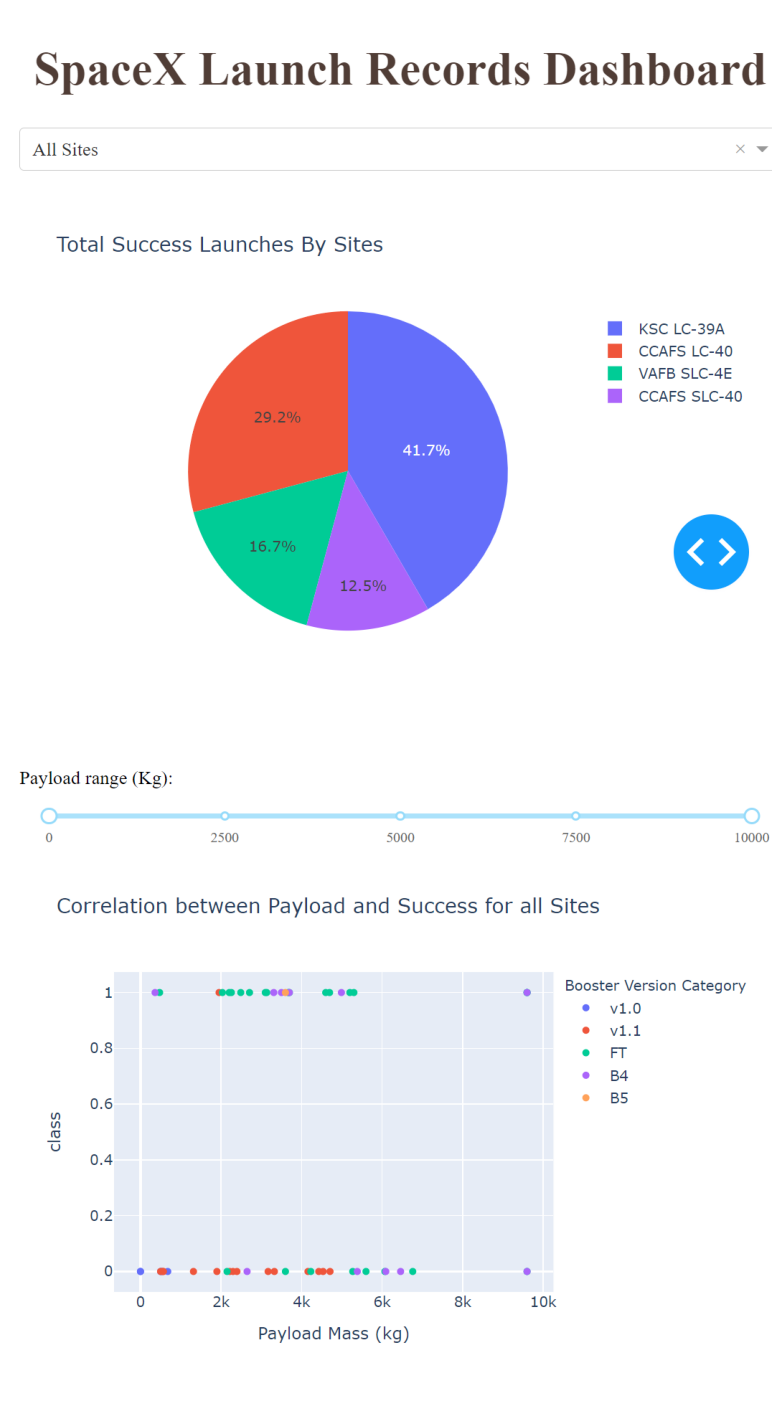

In [103]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# URL of the image
url = "https://github.com/supat-roong/IBM-Data-Science-Capstone-Project/blob/main/Dashboard%20Example.png?raw=true"

# Fetch the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Create a figure with a larger size
plt.figure(figsize=(30, 18))  # Adjust the width and height to make it super big
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

## Predict analysis

#### We will determine if the first stage rocket will land using predictive analysis by classification models.

## Import Libraries and Define Auxiliary Functions

In [104]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [105]:
# This function is to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Features Selection
From the exploratory data analysis, we obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction.

In [106]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial


### Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head.

In [107]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head()

,Orbit,LaunchSite,LandingPad,Serial


## Merge dummy variable to the feature

In [108]:
X = features.merge(features_one_hot, left_index=True, right_index=True)
X.head()

,FlightNumber,PayloadMass,Orbit_x,LaunchSite_x,Flights,GridFins,Reused,Legs,LandingPad_x,Block,ReusedCount,Serial_x,Orbit_y,LaunchSite_y,LandingPad_y,Serial_y


## Cast all numeric columns to float64

In [110]:
X.astype('float64')

,FlightNumber,PayloadMass,Orbit_x,LaunchSite_x,Flights,GridFins,Reused,Legs,LandingPad_x,Block,ReusedCount,Serial_x,Orbit_y,LaunchSite_y,LandingPad_y,Serial_y


### Select target variable
The target variable is Class column from the df dataframe

In [111]:
Y = df['Class'].to_numpy()

## Preprocessing dataset
Standardize the data in X

In [117]:
# List of all potential numerical features
all_potential_features = ['PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Orbit_Earth', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_VLEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_MEO', 'Orbit_SSO', 'Orbit_ES-L1', 'Orbit_SO']

# Filter to keep only the features that exist in the DataFrame
numerical_features = [col for col in all_potential_features if col in df.columns]

print("Actual numerical features:", numerical_features)

Actual numerical features: ['PayloadMass', 'Flights', 'Block', 'ReusedCount']


### split the data X and Y into training and test data
For the consistency of this report, I set random_state=2

In [138]:
import pandas as pd
import requests

# URL of the SpaceX API
spacex_url = "https://api.spacexdata.com/v4/launches/past"

# Fetch the data from the API
response = requests.get(spacex_url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response to a DataFrame
    data = response.json()
    df = pd.DataFrame(data)

    # Check the shape and first few rows of the DataFrame
    print("Shape of DataFrame after loading:", df.shape)
    print("First few rows of DataFrame:")
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")

Shape of DataFrame after loading: (187, 27)
First few rows of DataFrame:
                                                                        fairings  \
0  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
1  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
2  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
3  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
4  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   

                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [141]:
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['fairings', 'links', 'static_fire_date_utc', 'static_fire_date_unix',
       'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew',
       'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming',
       'cores', 'auto_update', 'tbd', 'launch_library_id', 'id'],
      dtype='object')


In [143]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split

# Step 1: Fetch the data from the SpaceX API
spacex_url = "https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response to a DataFrame
    data = response.json()
    df = pd.DataFrame(data)

    # Step 2: Display the shape and first few rows of the DataFrame
    print("Shape of DataFrame after loading:", df.shape)
    print("First few rows of DataFrame:")
    print(df.head())

    # Print the columns to check for the correct names
    print("Columns in DataFrame:", df.columns)
else:
    print(f"Failed to fetch data: {response.status_code}")

# Step 3: Extract payload mass
# Initialize a new column for payload mass
df['payload_mass'] = df['payloads'].apply(lambda x: sum([p['mass'] for p in x if 'mass' in p]) if isinstance(x, list) else 0)

# Check for None values in the 'success' column
print("Count of None values in 'success':", df['success'].isnull().sum())

# Drop rows with None values in the 'success' column
df = df.dropna(subset=['success'])

# Ensure the target variable is an integer
df['success'] = df['success'].astype(int)

# Prepare features (X) and target (Y)
X = df[['payload_mass', 'flight_number']]  # Use the extracted payload mass and flight number
Y = df['success']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of DataFrame after loading: (187, 27)
First few rows of DataFrame:
                                                                        fairings  \
0  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
1  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
2  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
3  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   
4  {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}   

                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [145]:
Y_test.shape

(38,)

## Model training
### Logistic Regression
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [148]:
logreg_cv = GridSearchCV(lr, parameters, cv=5)  # Change cv from 10 to 5

In [149]:
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=10)
logreg_cv = GridSearchCV(lr, parameters, cv=stratified_cv)

In [150]:
print("Class distribution in Y:")
print(Y.value_counts())

Class distribution in Y:
success
1    181
0      5
Name: count, dtype: int64


In [155]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model with a valid number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Change this to a valid number

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X and Y are already defined and split into training and testing sets
# Example: X_train, X_test, Y_train, Y_test

# Create KNN model with a valid number of neighbors
n_neighbors = min(5, len(Y_train))  # Set n_neighbors to the minimum of 5 or the number of training samples
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the model
knn.fit(X_train, Y_train)

# Predict on the test set
Y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [158]:
logreg_cv = GridSearchCV(lr, parameters, cv=5)  # Change cv from 10 to 5

In [159]:
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5)  # Use a smaller number of splits
logreg_cv = GridSearchCV(lr, parameters, cv=stratified_cv)

In [160]:
print("Class distribution in Y:")
print(Y.value_counts())

Class distribution in Y:
success
1    181
0      5
Name: count, dtype: int64
